# Importing Dataset

In [249]:
import pandas as pd 
df=pd.read_csv('Movies.csv')
df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# Renaming columns and plotting heatmap 

In [250]:
df.rename(columns={"Runtime (Minutes)":"Runtime", "Revenue (Millions)": "Revenue"}, inplace=True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1000 non-null   object 
 1   Genre        1000 non-null   object 
 2   Description  1000 non-null   object 
 3   Director     1000 non-null   object 
 4   Actors       1000 non-null   object 
 5   Year         1000 non-null   int64  
 6   Runtime      1000 non-null   int64  
 7   Rating       1000 non-null   float64
 8   Votes        1000 non-null   int64  
 9   Revenue      872 non-null    float64
 10  Metascore    936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_16232\3898237727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

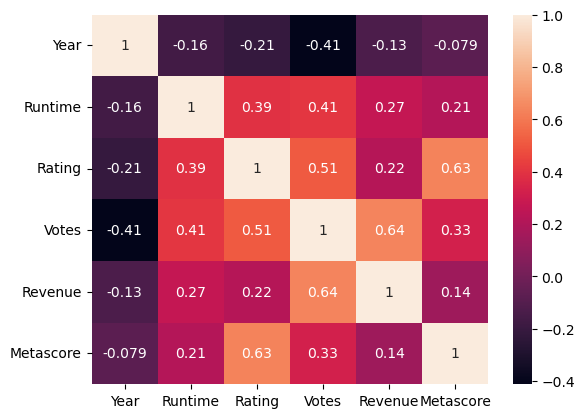

In [252]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

# Fixing Null Values and dropping Year column

In [253]:
df.drop(['Year'], axis=1, inplace=True)
df.isna().sum()

Title            0
Genre            0
Description      0
Director         0
Actors           0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

In [254]:
df['Revenue'].fillna(df['Revenue'].mean(), inplace=True)
df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)
df.isna().sum()

Title          0
Genre          0
Description    0
Director       0
Actors         0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

# Combining Text Features

In [255]:
def preprocess_text(text):
    # Tokenize the text (split into individual words)
    words = text.split()
    
    # Remove punctuation and convert to lowercase
    words = [word.lower().strip(".,!?") for word in words]
    
    # Join the words back into a single string
    preprocessed_text = " ".join(words)
    
    return preprocessed_text

df['combined_text'] = df['Title'] + ' ' + df['Genre'] + ' ' + df['Description'] + ' ' + df['Director'] + ' ' + df['Actors']
df['combined_text'] = df['combined_text'].apply(preprocess_text)
df['combined_text']

0      guardians of the galaxy action,adventure,sci-f...
1      prometheus adventure,mystery,sci-fi following ...
2      split horror,thriller three girls are kidnappe...
3      sing animation,comedy,family in a city of huma...
4      suicide squad action,adventure,fantasy a secre...
                             ...                        
995    secret in their eyes crime,drama,mystery a tig...
996    hostel: part ii horror three american college ...
997    step up 2: the streets drama,music,romance rom...
998    search party adventure,comedy a pair of friend...
999    nine lives comedy,family,fantasy a stuffy busi...
Name: combined_text, Length: 1000, dtype: object

In [256]:
combined_df = df[['combined_text', 'Runtime', 'Votes', 'Revenue', 'Metascore', 'Rating']]
combined_df

,combined_text,Runtime,Votes,Revenue,Metascore,Rating
0,"guardians of the galaxy action,adventure,sci-f...",121,757074,333.130000,76.0,8.1
1,"prometheus adventure,mystery,sci-fi following ...",124,485820,126.460000,65.0,7.0
2,"split horror,thriller three girls are kidnappe...",117,157606,138.120000,62.0,7.3
3,"sing animation,comedy,family in a city of huma...",108,60545,270.320000,59.0,7.2
4,"suicide squad action,adventure,fantasy a secre...",123,393727,325.020000,40.0,6.2
...,...,...,...,...,...,...
995,"secret in their eyes crime,drama,mystery a tig...",111,27585,82.956376,45.0,6.2
996,hostel: part ii horror three american college ...,94,73152,17.540000,46.0,5.5
997,"step up 2: the streets drama,music,romance rom...",98,70699,58.010000,50.0,6.2
998,"search party adventure,comedy a pair of friend...",93,4881,82.956376,22.0,5.6


# TF-IDF Transformation 
For converting text features into numerical data

In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_text_tfidf = tfidf_vectorizer.fit_transform(combined_df['combined_text'])
print(X_text_tfidf)

  (0, 7259)	0.2065048323569057
  (0, 9336)	0.20188038218955173
  (0, 1894)	0.17192384937787283
  (0, 1152)	0.18506630831662618
  (0, 2367)	0.20188038218955173
  (0, 8904)	0.20188038218955173
  (0, 6548)	0.20188038218955173
  (0, 1599)	0.13639657986575054
  (0, 3694)	0.2258854085143705
  (0, 4425)	0.12170719494936025
  (0, 8747)	0.20188038218955173
  (0, 1878)	0.19415248979708183
  (0, 8186)	0.19415248979708183
  (0, 3325)	0.10036747820131245
  (0, 9015)	0.18783834196070856
  (0, 3011)	0.24989043483918927
  (0, 7968)	0.16241957107979316
  (0, 8453)	0.15387032953991417
  (0, 9240)	0.16845776580324376
  (0, 8445)	0.10078791248015383
  (0, 3222)	0.1597542615030222
  (0, 525)	0.12003786301596768
  (0, 2004)	0.21815751612190062
  (0, 4299)	0.21815751612190062
  (0, 3663)	0.139828289311071
  :	:
  (999, 1568)	0.25969367473586824
  (999, 8026)	0.25969367473586824
  (999, 5920)	0.24510076312577053
  (999, 381)	0.24510076312577053
  (999, 7808)	0.22671586877426556
  (999, 7782)	0.245100763125770

In [258]:
X_combined = pd.DataFrame(X_text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_combined[['Runtime', 'Votes', 'Revenue', 'Metascore']] = combined_df[['Runtime', 'Votes', 'Revenue', 'Metascore']]
X_combined

,000,007,10,100,10th,12,127,12th,13,13th,...,émilie,ólafsson,ólafur,óscar,ôsugi,øvredal,Runtime,Votes,Revenue,Metascore
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,121,757074,333.130000,76.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,124,485820,126.460000,65.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,117,157606,138.120000,62.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,108,60545,270.320000,59.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,123,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,111,27585,82.956376,45.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,94,73152,17.540000,46.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,98,70699,58.010000,50.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93,4881,82.956376,22.0


In [259]:
X_combined.isna().sum()

000          0
007          0
10           0
100          0
10th         0
            ..
øvredal      0
Runtime      0
Votes        0
Revenue      0
Metascore    0
Length: 9363, dtype: int64

# Using Random Forest

In [260]:
from sklearn.ensemble import RandomForestRegressor
# Build the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.41235840499999993
Root Mean Squared Error: 0.6421513879140961
R-squared: 0.5698165119908529


# Predicting on new movie (Oppenheimer)

In [261]:
new_movie_combined_text = "oppenheimer History, Thriller, Mystery biography American Prometheus life American theoretical physicist developing first nuclear weaponsAtomic Age. Christopher Nolan Cillian Muphy, Emily Blunt"
new_movie_numerical_features = [180, 300000, 500, 88]

new_movie_text_tfidf = tfidf_vectorizer.transform([new_movie_combined_text])

new_movie_combined = pd.DataFrame(new_movie_text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
new_movie_combined[['Runtime', 'Votes', 'Revenue', 'Metascore']] = new_movie_numerical_features

predicted_rating = rf_model.predict(new_movie_combined)

print("Predicted Rating(Random Forest):", predicted_rating[0])

Predicted Rating(Random Forest): 7.669000000000003
